In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [143]:
oil_prices = pd.read_csv('oil.csv')

In [145]:
oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52
127,Oil prices in constant 1997 dollars. 1870-1997,NaN


In [147]:
oil_prices = oil_prices[~np.isnan(oil_prices[oil_prices.columns[1]])]

In [148]:
oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
122,1992,18.38
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52


In [150]:
oil_prices.dtypes

Year                                               object
Oil prices in constant 1997 dollars. 1870-1997    float64
dtype: object

In [155]:
oil_prices = oil_prices.convert_objects(convert_dates='coerce')

In [156]:
oil_prices.rename(columns = {oil_prices.columns[1]: 'Oil_Price_1997_Dollars'},inplace=True)

In [157]:
oil_prices.head()

,Year,Oil_Price_1997_Dollars
0,1870-01-01,58.53
1,1871-01-01,49.09
2,1872-01-01,24.68
3,1873-01-01,16.71
4,1874-01-01,19.86


In [116]:
matplotlib.style.use('ggplot')

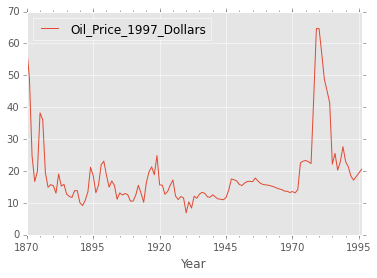

In [117]:
oil_prices.plot(x='Year',y='Oil_Price_1997_Dollars')

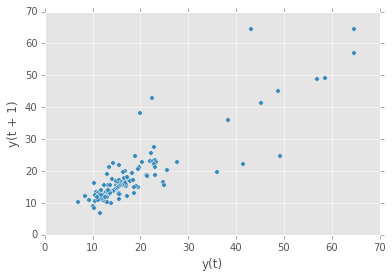

In [159]:
from pandas.tools.plotting import lag_plot

lag_plot(oil_prices.Oil_Price_1997_Dollars)

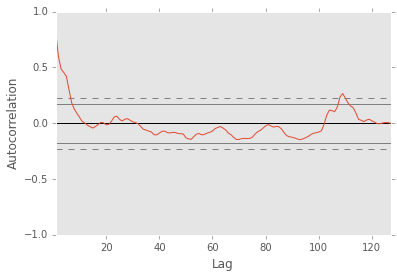

In [102]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(oil_prices['Oil_Price_1997_Dollars'])

In [176]:
car_crashes=pd.read_csv("car_crashes.csv")
car_crashes.Year=car_crashes.Year.astype(str)
car_crashes=car_crashes.convert_objects(convert_dates='coerce')

In [177]:
car_crashes.head()

,Year,Car_Crash_Fatalities_US
0,1900-01-01,36
1,1901-01-01,54
2,1902-01-01,79
3,1903-01-01,117
4,1904-01-01,172


In [180]:
car_crashes['Car_Crash_Fatalities_US']=car_crashes['Car_Crash_Fatalities_US']/1000

In [181]:
oil_prices_car_crashes = pd.merge(oil_prices,car_crashes,on='Year')

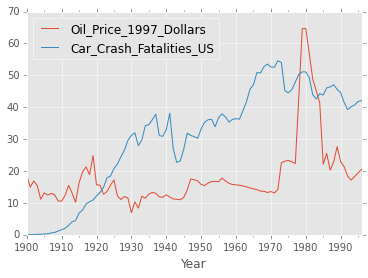

In [183]:
oil_prices_car_crashes.plot(x='Year')


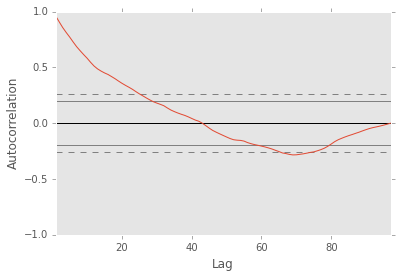

In [188]:
autocorrelation_plot(oil_prices_car_crashes[['Car_Crash_Fatalities_US','Oil_Price_1997_Dollars']])